In [1]:
data = pd.read_csv("vehicles.csv")

### 데이터 전처리

In [61]:
len(data)

509577

In [76]:
df = data[["id","model","price","year","manufacturer","cylinders","fuel","odometer","title_status","transmission","drive","type","paint_color",'state','vin']]

In [77]:
df = df.dropna(how = "any")

In [78]:
len(df)

120082

In [79]:
df = df.loc[df["vin"].drop_duplicates(keep="last").index]

In [80]:
len(df)

77339

In [81]:
df = df[(df["price"] != 0) & (df["price"] <= 1000000) & (df["price"] > 100)]

In [82]:
df = df[(df["odometer"] != 0) & (df["odometer"] <= 1000000) & (df["odometer"] >= 100)]

In [83]:
df = df[(df["year"]!=0.0) & (df["year"]!=2021.0)]

In [84]:
ls  = []
start = ["1","2","3","4","5", "6", "7", "8","9"]
for j in start:
    s= j
    input_num  = 9-int(s)
    for i in range (input_num):
        s =  str(s)+str(int(s[-1])+1 )
        a = int(s)
        b= int("".join(reversed(s)))
        ls.append(a)
        ls.append(b)
for rm_price in ls:
    df = df[df["price"] != rm_price]        

In [85]:
remove_word = []

start = ["1","2","3","4","5", "6", "7", "8","9"]
for j in start:
    plus_num = j
    start_word = ""
    for i in range(9):
        start_word += plus_num
        r = int(start_word)
        remove_word.append(r)
    
for price in remove_word:
    df = df[df["price"] != price]    

In [86]:
len(df)

71061

In [ ]:
### 

In [ ]:
# 100000달러 이상 차중 살아남을 애들
alive_car = [7033472903,7039773014,7049284671,7043599850,7049033507,7036156093,7049707044,7048009986,7041367828,7047810612,7045671330,7047378977]

In [99]:
df = df[(df["price"]<100000) | df['id'].isin(alive_car)]

In [129]:
len(df)

71047

In [103]:
df.year.unique()

array([2012., 2008., 1999., 2016., 2017., 2019., 2018., 2011., 2004.,
       1950., 2013., 2002., 2007., 2006., 2009., 2005., 1986., 1998.,
       1977., 2010., 1991., 2015., 2000., 2014., 1964., 1995., 2001.,
       2003., 1997., 1990., 1993., 1978., 1956., 1971., 1959., 1992.,
       1988., 1979., 1984., 1972., 1996., 1985., 1989., 1929., 1994.,
       1973., 1974., 1966., 1965., 1967., 1932., 1953., 1969., 1968.,
       1987., 1981., 2020., 1982., 1976., 1963., 1957., 1983., 1947.,
       1928., 1975., 1970., 1951., 1954., 1962., 1933., 1941., 1980.,
       1955., 1958., 1960., 1927., 1961., 1948., 1930., 1937., 1939.,
       1946., 1931., 1940., 1934., 1936., 1952., 1926., 1949., 1935.,
       1938.])

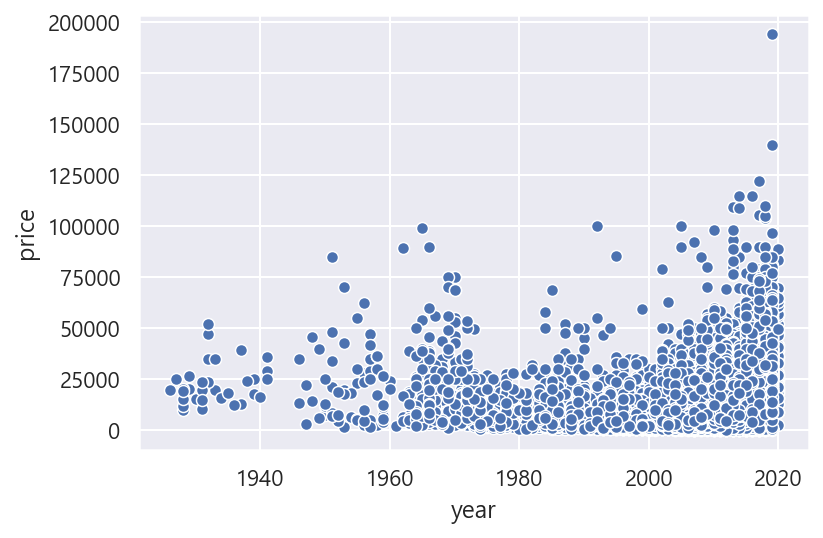

In [108]:
sns.scatterplot(y="price", x="year", data=df )

In [112]:
model = sm.OLS.from_formula("scale(price) ~ C(year)+scale(odometer)+C(manufacturer)+C(cylinders)+C(fuel)+C(title_status)+C(transmission)+C(drive)+C(type)+C(paint_color)+C(state)", df)

result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           scale(price)   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     863.9
Date:                Thu, 26 Mar 2020   Prob (F-statistic):               0.00
Time:                        16:36:45   Log-Likelihood:                -53909.
No. Observations:               71047   AIC:                         1.083e+05
Df Residuals:                   70821   BIC:                         1.103e+05
Df Model:                         225                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

### 아웃라이어라고 판단되는 데이터전처리 후 Train_test 분리후 성능검사

In [198]:
df_new = df[(df['year'] > 2000) &(df_new['odometer'] < 100000)&(df_new["price"] !=0)&(df_new["price"] > 100)]

In [274]:
model = sm.OLS.from_formula("scale(price) ~ C(year)+scale(odometer)+C(manufacturer)+C(cylinders)+C(fuel)+C(title_status)+C(transmission)+C(drive)+C(type)+C(paint_color)+C(state)", df_new)

result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           scale(price)   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     198.2
Date:                Thu, 26 Mar 2020   Prob (F-statistic):               0.00
Time:                        19:30:28   Log-Likelihood:                -12453.
No. Observations:               14485   AIC:                         2.521e+04
Df Residuals:                   14335   BIC:                         2.634e+04
Df Model:                         149                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [119]:
from sklearn.model_selection import train_test_split

In [137]:
X = df_new.drop(["price"], axis=1)
y = df_new.price


In [126]:
label = X.columns

In [164]:
len(df)

71047

In [279]:
X_train, X_test= train_test_split(df_new, test_size=0.2,random_state= 9 )


In [302]:
model = sm.OLS.from_formula("price ~ C(year) + scale(odometer)+C(manufacturer)+C(cylinders)+C(fuel)+C(title_status)+C(transmission)+C(drive)+C(type)+C(paint_color)+C(state)", data=X_train)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     170.8
Date:                Thu, 26 Mar 2020   Prob (F-statistic):               0.00
Time:                        19:45:18   Log-Likelihood:            -1.1860e+05
No. Observations:               11588   AIC:                         2.375e+05
Df Residuals:                   11450   BIC:                         2.385e+05
Df Model:                         137                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

### 예측 R2 score 성능

In [303]:
pred = result.predict(X_test)

rss = ((X_test.price - pred) ** 2).sum()
tss = ((X_test.price - X_test.price.mean())** 2).sum()
rsquared = 1 - rss / tss
rsquared

#from sklearn.metrics import r2_score
#r2_score(X_test['price'],pred)

0.6245412030448552

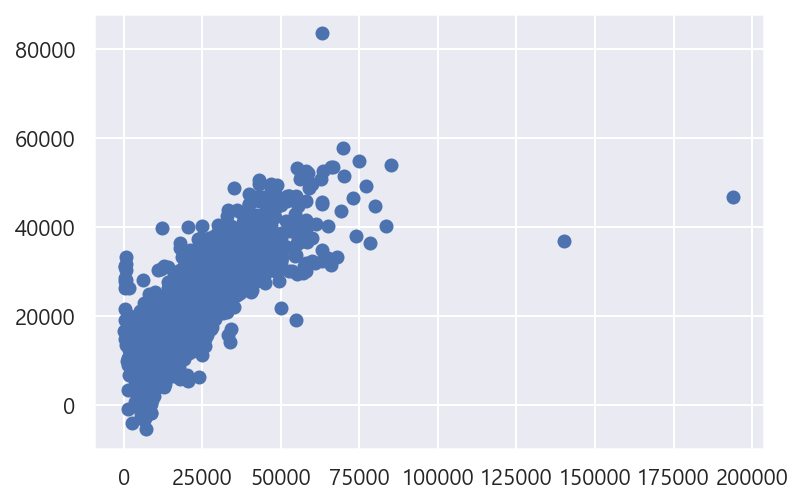

In [304]:
plt.scatter(X_test['price'],pred)

In [305]:
pred.min()

-5292.099012461047

In [306]:
pred[pred == -5292.099012461047]

147804   -5292.099012
dtype: float64

### pred 값이 0이하인 데이터

In [307]:
df_new[df_new.index == 147804]

,id,model,price,year,manufacturer,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,vin
147804,7046696691,altima,6995,2008.0,nissan,4 cylinders,gas,30700.0,clean,automatic,fwd,coupe,red,ct,1N4AL24EX8C264713


In [301]:
df_new[df_new.index == 264270]

,id,model,price,year,manufacturer,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,vin
264270,7041412980,altima,2500,2003.0,nissan,4 cylinders,gas,501.0,clean,automatic,fwd,sedan,red,md,1N4AL11E13C331674


In [295]:
df_new[df_new.index == 157443]

,id,model,price,year,manufacturer,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,vin
157443,7042747901,express 1500 cargo van,5000,2002.0,chevrolet,6 cylinders,gas,29000.0,salvage,automatic,rwd,van,grey,fl,1GCFG15W021122797


In [285]:
df_new[df_new.index == 264270]

,id,model,price,year,manufacturer,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,vin
264270,7041412980,altima,2500,2003.0,nissan,4 cylinders,gas,501.0,clean,automatic,fwd,sedan,red,md,1N4AL11E13C331674


In [208]:
df_new[df_new.index == 49199]

,id,model,price,year,manufacturer,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,vin
49199,7045435316,sonata limited,4500,2007.0,hyundai,6 cylinders,gas,99000.0,clean,automatic,fwd,sedan,white,wy,5NPEU46F07H212259


0.7321428961915488